In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv -O netflix.csv

--2023-08-07 00:57:54--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 99.84.178.226, 99.84.178.93, 99.84.178.132, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|99.84.178.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  --.-KB/s    in 0.05s   

2023-08-07 00:57:54 (59.1 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [ ]:
data=pd.read_csv('netflix.csv')

# 1. Defining Problem Statement and Analysing basic metrics

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')



*   We are given data from Netflix which is a leading online movie/tv show streaming platform. Netflix is known for its premium content and the user experience it provides to its customers like recommendations.



*   We have to analyse the data and generate valuable insights on the basis of which we can suggest which type of movies and TV shows should Netflix focus on in order to increase their customer engagement and grow their business further.

*   We are provided with ample amout of data from Netflix which includes the show id, its title, type(movie/tv show), their directors, cast, the countries in which they were produced, date on which the content was added to the platform, release year of the movie/tv show, their rating given by Netflix, duration, the category they are listed in and a brief discription of the content.

This is the basic analysis of the data, deep analysis is done further below.

# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.shape

(8807, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.describe(include=[object])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


Observation:


*   Data of 8807 different movies/tv shows is given to us.
*   All columns are object type except for release_year which is int type.

*   Although a lot of data is provided but some data is missing such as 2634 content are missing directors, 825 are missing cast, 831 are missing country, 10 are missing date_added, 4 are missing rating and 3 are missing duration.
*   The oldest content available on Netflix is from 1925 whereas the latest is from 2021.





# 3. Non-Graphical Analysis: Value counts and unique attributes

**Pre-Processing**



Divide the data into 2 categories- movies and tv shows for better analysis

In [ ]:
m_data=data[data['type']=='Movie']

In [ ]:
tv_data=data[data['type']=='TV Show']

**Analysis:**

**How many movies and tv shows are available on Netflix?**

In [ ]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

**How many directors are there for movies and tv shows in the given data?**

In [ ]:
m_data['director'].str.split(', ').explode().nunique()        #count of directors for movies

4777

In [ ]:
tv_data['director'].str.split(', ').explode().nunique()       #count of directors for tv shows

299

Observation:
For movies there are 4777 directors whereas for tv shows there are 299 in the given dataframe.

**Who are the top directors for movies and TV Shows?**

In [ ]:
m_data['director'].str.split(', ').explode().value_counts()

Rajiv Chilaka        22
Jan Suter            21
Raúl Campos          19
Suhas Kadav          16
Marcus Raboy         15
                     ..
Vrinda Samartha       1
Nicholaus Goossen     1
Stig Bergqvist        1
Paul Demeyer          1
Mozez Singh           1
Name: director, Length: 4777, dtype: int64

In [ ]:
tv_data['director'].str.split(', ').explode().value_counts()

Alastair Fothergill      3
Ken Burns                3
Jung-ah Im               2
Gautham Vasudev Menon    2
Iginio Straffi           2
                        ..
Jesse Vile               1
Ellena Wood              1
Picky Talarico           1
Pedro Waddington         1
Michael Cumming          1
Name: director, Length: 299, dtype: int64

Observation:


*   Rajiv Chilaka and Jan Sutler are the two directors with maximum the movies directed on Netflix. Rajiv Chilaka directed 22 movies whereas Jan Sutler directed 21 movies.
*   Alastair Fothergill and Ken Burns are the two directors who have directed the maximum number of TV Shows. Both of them directed 3 tv shows that are available on Netflix.



**Which is the most popular country where movies and tv shows are produced?**

In [ ]:
m_data['country'].str.split(', ').explode().nunique()       #total countries for movies

122

In [ ]:
m_data['country'].str.split(', ').explode().value_counts()

United States     2751
India              962
United Kingdom     532
Canada             319
France             303
                  ... 
Bermuda              1
Angola               1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 122, dtype: int64

In [ ]:
tv_data['country'].str.split(', ').explode().nunique()        #total countries for tv shows

66

In [ ]:
tv_data['country'].str.split(', ').explode().value_counts()

United States           938
United Kingdom          272
Japan                   199
South Korea             170
Canada                  126
                       ... 
Malta                     1
Belarus                   1
United Arab Emirates      1
Uruguay                   1
Switzerland               1
Name: country, Length: 66, dtype: int64

Observation:


*   Maximum number of movies are produced in United States followed by India and United Kingdom.
*   Maximum Number of TV shows are produced in United States followed by United Kingdom and Japan.



**Which are the most popular category/genre for movies and tv shows?**

In [ ]:
m_data['listed_in'].str.split(', ').explode().nunique()         #total categories for movies

20

In [ ]:
m_data['listed_in'].str.split(', ').explode().value_counts()

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: listed_in, dtype: int64

In [ ]:
tv_data['listed_in'].str.split(', ').explode().nunique()            #total categories for tv shows

22

In [ ]:
tv_data['listed_in'].str.split(', ').explode().value_counts()

International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
Name: listed_in, dtype: int64

Observation:


*   International movies is the most popular genre for movies on Netflix followed by Drama and Comedies.
*   International TV Shows is the most popular genre for TV shows on Netflix followed by TV Dramas and TV Comedies.



**What is the range date_added and release_year for movies and tv shows available on Netflix?**

In [ ]:
m_data['release_year'].agg(['min','max'])

min    1942
max    2021
Name: release_year, dtype: int64

In [ ]:
tv_data['release_year'].agg(['min','max'])

min    1925
max    2021
Name: release_year, dtype: int64

In [ ]:
m_data['date_added']=pd.to_datetime(m_data['date_added'])
tv_data['date_added']=pd.to_datetime(tv_data['date_added'])

<ipython-input-30-d0ab5beaada1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data['date_added']=pd.to_datetime(m_data['date_added'])
<ipython-input-30-d0ab5beaada1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data['date_added']=pd.to_datetime(tv_data['date_added'])


In [ ]:
m_data['date_added'].agg(['min','max'])

min   2008-01-01
max   2021-09-25
Name: date_added, dtype: datetime64[ns]

In [ ]:
tv_data['date_added'].agg(['min','max'])

min   2008-02-04
max   2021-09-24
Name: date_added, dtype: datetime64[ns]

Observation:


*   The oldest movies available on Netflix was released in 1942 whereas the latest one was released in 2021. Whereas, the first movie was added to the platform on 2008-01-01 and the newest one was added on 2021-09-25.
*   The oldest tv show available on Netflix was released in 1925 whereas the latest one was released in 2021. Whereas, the first movie was added to the platform on 2008-02-04 and the newest one was added on 2021-09-24.



# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Pre-Processsing

we will be unnesting the data in 3 respective sub-dataframes with show_id and the unnested rows having director, cast, country and listed_in for both movies as well as tv shows.

In [ ]:
mdir_data=m_data.loc[:,['show_id','director']]                   #creating mdir_data with unnested values of movies
mdir_data['director']=mdir_data['director'].str.split(', ')
mdir_data=mdir_data.explode('director')

In [ ]:
mdir_data.head()

,show_id,director
0,s1,Kirsten Johnson
6,s7,Robert Cullen
6,s7,José Luis Ucha
7,s8,Haile Gerima
9,s10,Theodore Melfi


In [ ]:
tvdir_data=tv_data.loc[:,['show_id','director']]                   #creating tvdir_data with unnested values of tv
tvdir_data['director']=tvdir_data['director'].str.split(', ')
tvdir_data=tvdir_data.explode('director')

In [ ]:
tvdir_data.head()

,show_id,director
1,s2,NaN
2,s3,Julien Leclercq
3,s4,NaN
4,s5,NaN
5,s6,Mike Flanagan


In [ ]:
mcast_data=m_data.loc[:,['show_id','cast']]                #creating mcast_data with unnested values of movies
mcast_data['cast']=mcast_data['cast'].str.split(', ')
mcast_data=mcast_data.explode('cast')

In [ ]:
mcast_data.head()

,show_id,cast
0,s1,NaN
6,s7,Vanessa Hudgens
6,s7,Kimiko Glenn
6,s7,James Marsden
6,s7,Sofia Carson


In [ ]:
tvcast_data=tv_data.loc[:,['show_id','cast']]                #creating tvcast_data with unnested values of tv shows
tvcast_data['cast']=tvcast_data['cast'].str.split(', ')
tvcast_data=tvcast_data.explode('cast')

In [ ]:
mcountry_data=m_data.loc[:,['show_id','country']]              #creating mcountry_data with unnested values of movies
mcountry_data['country']=mcountry_data['country'].str.split(', ')
mcountry_data=mcountry_data.explode('country')

In [ ]:
mcountry_data.head()

,show_id,country
0,s1,United States
6,s7,NaN
7,s8,United States
7,s8,Ghana
7,s8,Burkina Faso


In [ ]:
tvcountry_data=tv_data.loc[:,['show_id','country']]              #creating tvcountry_data with unnested values of tv shows
tvcountry_data['country']=tvcountry_data['country'].str.split(', ')
tvcountry_data=tvcountry_data.explode('country')

In [ ]:
mlisted_data=m_data.loc[:,['show_id','listed_in']]                 #creating mlisted_data with unnested values of movies
mlisted_data['listed_in']=mlisted_data['listed_in'].str.split(', ')
mlisted_data=mlisted_data.explode('listed_in')

In [ ]:
tvlisted_data=tv_data.loc[:,['show_id','listed_in']]                 #creating tvlisted_data with unnested values
tvlisted_data['listed_in']=tvlisted_data['listed_in'].str.split(', ')
tvlisted_data=tvlisted_data.explode('listed_in')

In [ ]:
tvlisted_data.head()

,show_id,listed_in
1,s2,International TV Shows
1,s2,TV Dramas
1,s2,TV Mysteries
2,s3,Crime TV Shows
2,s3,International TV Shows


We will be converting duration of movies in int(min) and tv shows in number of seasons.

In [ ]:
m_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
m_data['duration']=m_data['duration'].str.split()                             #converting movie duration to number of minutes
m_data['duration']=m_data['duration'].str[0]
m_data['duration']=m_data['duration'].fillna(m_data['duration'].median())     #filling missing values as median
m_data['duration']=m_data['duration'].astype(int)

<ipython-input-47-c35d9b363654>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data['duration']=m_data['duration'].str.split()                             #converting movie duration to number of minutes
<ipython-input-47-c35d9b363654>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data['duration']=m_data['duration'].str[0]
<ipython-input-47-c35d9b363654>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
m_data.rename(columns={'duration':'duration in min'},inplace=True)

<ipython-input-48-0e9035c9e658>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data.rename(columns={'duration':'duration in min'},inplace=True)


In [ ]:
m_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration in min,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
tv_data['duration']=tv_data['duration'].str.split()                             #converting tv show duration to number of seasons
tv_data['duration']=tv_data['duration'].str[0]
tv_data['duration']=tv_data['duration'].fillna(tv_data['duration'].median())     #filling missing values as median
tv_data['duration']=tv_data['duration'].astype(int)
tv_data.rename(columns={'duration':'duration(no. of seasons)'},inplace=True)

<ipython-input-50-8c04e0f9a735>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data['duration']=tv_data['duration'].str.split()                             #converting tv show duration to number of seasons
<ipython-input-50-8c04e0f9a735>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data['duration']=tv_data['duration'].str[0]
<ipython-input-50-8c04e0f9a735>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

We will be adding a new column 'year_diff' which will give is the difference between the release year and date added year(release_year-date_added)

In [ ]:
data['date_added']=pd.to_datetime(data['date_added'])
data['year_diff']=(data['date_added'].dt.year) - (data['release_year'])

Before Visual Analysis we want to use this pre-processed data to get non-graphical analysis for one more insight which is as follows:


---


**Are there any directors who always prefer certain cast in their movies and tv shows?**

In [ ]:
merge_data=mdir_data.merge(mcast_data,on='show_id')               #directors and cast of movies who prefer to work together
merge_data.groupby(['director','cast']).agg('count').sort_values(by='show_id',ascending=False).head(20)

show_id
director          cast                       
Rajiv Chilaka     Rajesh Kava              19
                  Julie Tejwani            19
                  Jigna Bhardwaj           18
                  Rupa Bhimani             18
                  Vatsal Dubey             16
                  Swapnil                  13
                  Mousam                   13
Suhas Kadav       Saurav Chakraborty        8
Toshiya Shinohara Koji Tsujitani            7
                  Satsuki Yukino            7
S.S. Rajamouli    Rana Daggubati            7
Toshiya Shinohara Houko Kuwashima           7
Yılmaz Erdoğan    Yılmaz Erdoğan            7
S.S. Rajamouli    Ramya Krishnan            7
                  Prabhas                   7
                  Nassar                    7
                  Tamannaah Bhatia          7
                  Sathyaraj                 7
Toshiya Shinohara Kumiko Watanabe           7
                  Kappei Yamaguchi          7

In [ ]:
merge_data=tvdir_data.merge(tvcast_data,on='show_id')
merge_data.groupby(['director','cast']).agg('count').sort_values(by='show_id',ascending=False).head(10)

show_id
director              cast                          
Alastair Fothergill   David Attenborough           3
Gautham Vasudev Menon Prakash Raj                  2
Stan Lathan           Dave Chappelle               2
Shin Won-ho           Sung Dong-il                 2
                      Lee Il-hwa                   2
Gautham Vasudev Menon Anjali                       2
                      Gautham Vasudev Menon        2
Onur Ünlü             Ahmet Mümtaz Taylan          1
                      Ali Atay                     1
                      Cengiz Bozkurt               1

Observation:


*   For movies, **Rajiv Chilaka is a director who prefers some actors in his movies like Rajesh Kava, Julie Tejwani, Jigna Bhardwaj, Rupa Bhimani, Vatsal Dubey, Swapnil and Mousam**. Apart from him Suhas Kadav, Toshiya Shinohara, S.S. Rajamouli and Yılmaz Erdoğan are also some other directors who prefer to cast some particular acors in their movies repetetively.
*   For TV Shows there are only few directors who prefer to cast the same actors for their shows. **Alastair Fothergill is one director who prefer to work with David Attenborough**. Apart from him few other directors namely Gautham Vasudev Menon, Stan Lathan, Shin Won-ho and Gautham Vasudev Menon are the directors who have casted people more than once for their tv shows.



# 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

**What is the percentage of movies and tv shows in the given data?**

Text(0.5, 1.0, 'Movies and TV Shows Contribution')

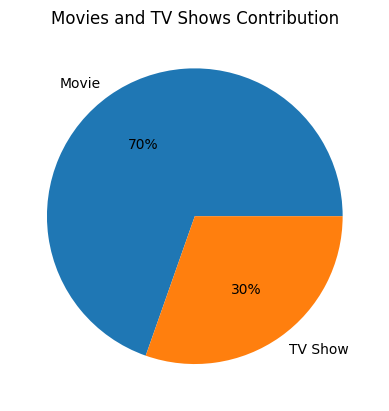

In [ ]:
d1=data['type'].value_counts()
plt.pie(d1,labels=d1.index,autopct='%.0f%%')
plt.title('Movies and TV Shows Contribution')

Observation:
The given dataset comprises of 70% of Movies and 30% TV Shows.

**Who are the most popular directors of TV Shows and Movies on Netflix?**

Text(0.5, 1.0, 'Most Popular Directors(Movies)')

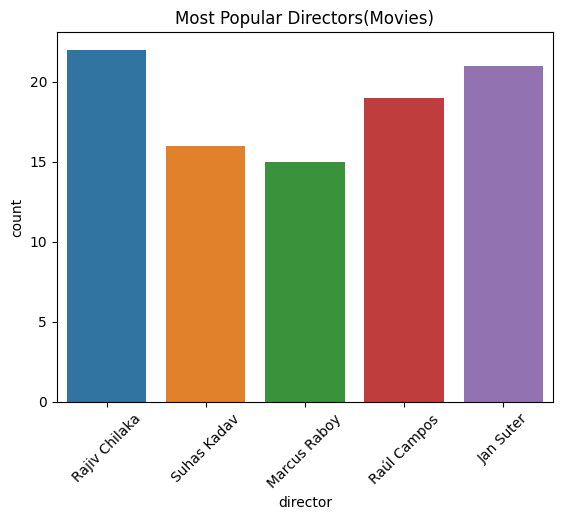

In [ ]:
sns.countplot(data=mdir_data[mdir_data['director'].isin(mdir_data['director'].value_counts().index[0:5])],x='director')     #data for movies
plt.xticks(rotation=45)
plt.title('Most Popular Directors(Movies)')

Text(0.5, 1.0, 'Most Popular Directors(TV Shows)')

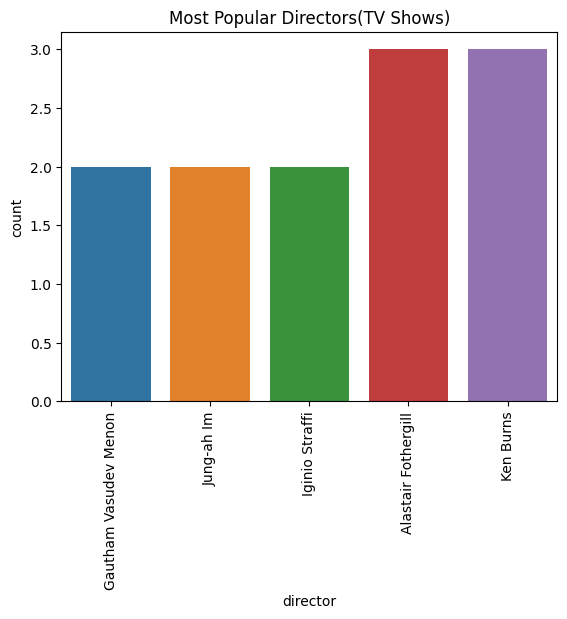

In [ ]:
sns.countplot(data=tvdir_data[tvdir_data['director'].isin(tvdir_data['director'].value_counts().index[0:5])],x='director')       #data for tv shows
plt.xticks(rotation=90)
plt.title('Most Popular Directors(TV Shows)')

Observation:


*   **Rajiv Chilaka** is the one who has directed maximum movies available on Netflix(i.e. about 22) followed by Jan Sutler(about 21) and Raul Campos(about 19)
*   **Ken Burns and Alastair Fothergill** are the two directors who have directed maximum number of TV Shows on Netflix i.e. 3.



**Which are the top countries where maximum number of movies/tv shows are produced making them the hot spots for producing content for Netflix?**

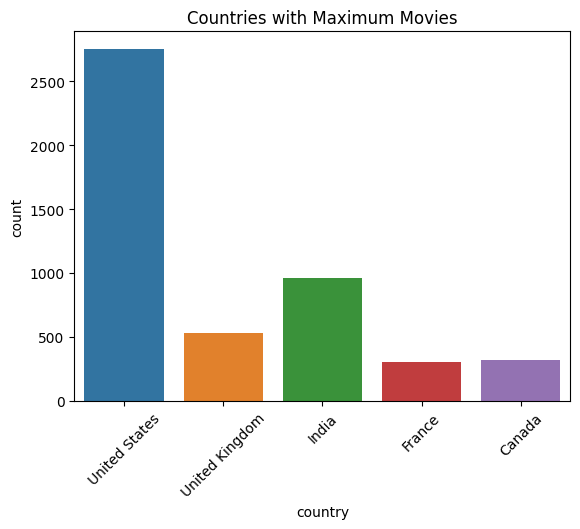

In [ ]:
sns.countplot(data=mcountry_data[mcountry_data['country'].isin(mcountry_data['country'].value_counts().index[:5])],x='country')     #data for movies
plt.xticks(rotation = 45)
plt.title('Countries with Maximum Movies')
plt.show()

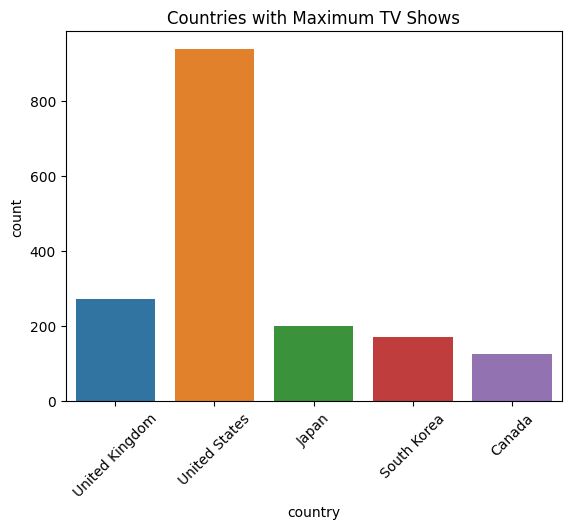

In [ ]:
sns.countplot(data=tvcountry_data[tvcountry_data['country'].isin(tvcountry_data['country'].value_counts().index[:5])],x='country')    #data for tv shows
plt.xticks(rotation = 45)
plt.title('Countries with Maximum TV Shows')
plt.show()

Observation:


*   United States is the most popular country for movie production as about 2700 available in Netflix were produced there followed by India and United Kingdom. This implies that most of the movies produced in United States are appreciated by the viewers.
*   For TV Shows also, United States is the most popular with about 900 tv shows produced in US available on Netflix followed by United Kingdom and Japan. This tells us that viewers mostly like tv shows from US followed by UK and Japan.



**What time of the year most of the content is added to the platform?**

Text(0.5, 1.0, 'Number of Movies Added to Netflix by Month')

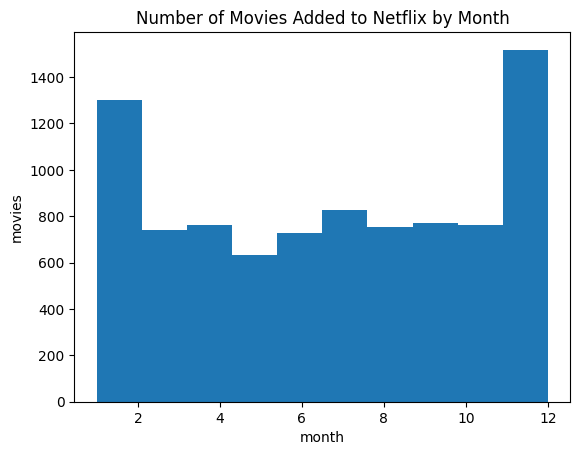

In [ ]:
plt.hist(data['date_added'].dt.month)
plt.xlabel('month')
plt.ylabel('movies')
plt.title('Number of Movies Added to Netflix by Month')

Observation:
*   From the above plot it is clear that **year end and starting (i.e. Dec and Jan)** is the timeperiod during which maximum number of movies/tvshows were added to Netflix.
*   By this we can infer that Dec and Jan are the two most popular months to add new movies on the platform.


**What is the ideal difference between the release year and date the content was added to the platform?**

<Axes: xlabel='year_diff', ylabel='Density'>

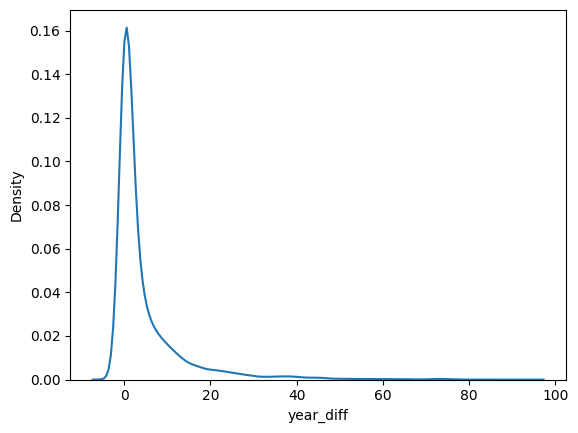

In [ ]:
sns.kdeplot(data['year_diff'])

Observation:


*   A majority of content available on netflix was added within 10 years of their release date.
*   With above information we can imply that new content is much popular among the viewers as compared to old movies and tv shows.



**Which are the most popular category for movies and tv shows on Netflix?**

Text(0.5, 1.0, 'Most Popular Movies Categories')

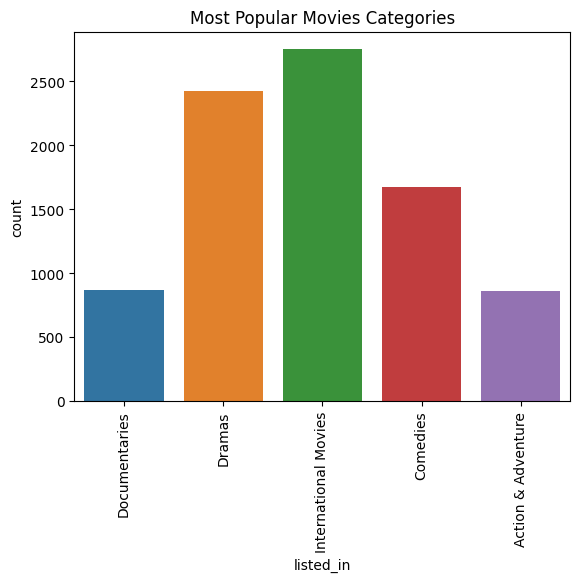

In [ ]:
sns.countplot(data=mlisted_data[mlisted_data['listed_in'].isin(mlisted_data['listed_in'].value_counts().index[:5])],x='listed_in')    #top 5 popular movie category
plt.xticks(rotation=90)
plt.title('Most Popular Movies Categories')

Text(0.5, 1.0, 'Most Popular TV Show Category')

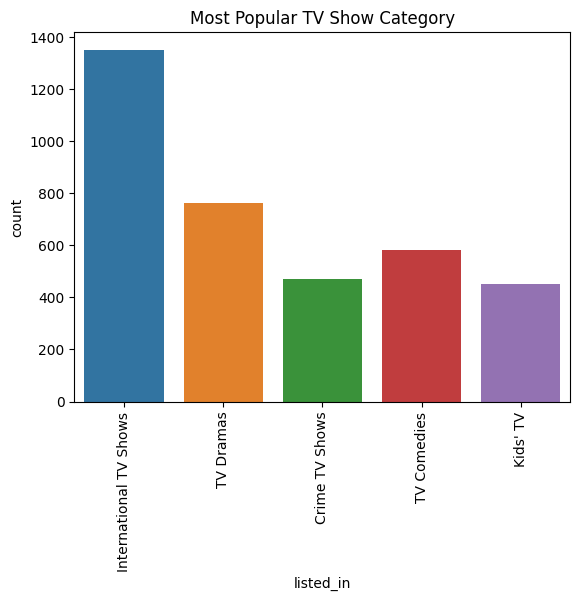

In [ ]:
sns.countplot(data=tvlisted_data[tvlisted_data['listed_in'].isin(tvlisted_data['listed_in'].value_counts().index[:5])],x='listed_in')    #top 5 popular tv show category
plt.xticks(rotation=90)
plt.title('Most Popular TV Show Category')

Observation:


*   International Movies is the most popular category for movies on Netflix followed by Dramas, Comedies, Action & Adventures and Documentries.
*   International TV Shows is the most popular category for tv shows available on Netflix followed by TV Dramas, TV Comedies, Crime TV Shows and Kids' TV.



**Since United States is the most popular country to produce movies and tv shows, which are the most famous directors in United States that have directed maximum number of movies and tv shows?**

Text(0.5, 1.0, 'Directors with max. movies in US')

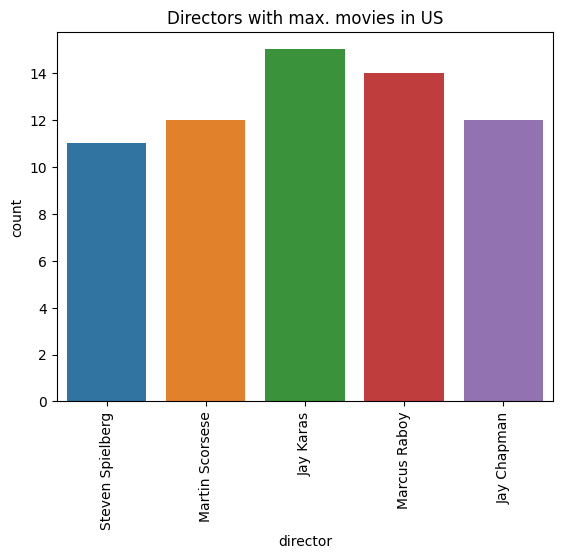

In [ ]:
usm_data=mcountry_data[mcountry_data['country']=='United States'].merge(mdir_data,on='show_id')                     #popular movie directors in US
sns.countplot(data=usm_data[usm_data['director'].isin(usm_data['director'].value_counts().index[:5])],x='director')
plt.xticks(rotation=90)
plt.title('Directors with max. movies in US')

Text(0.5, 1.0, 'directors with max. TV shows in US')

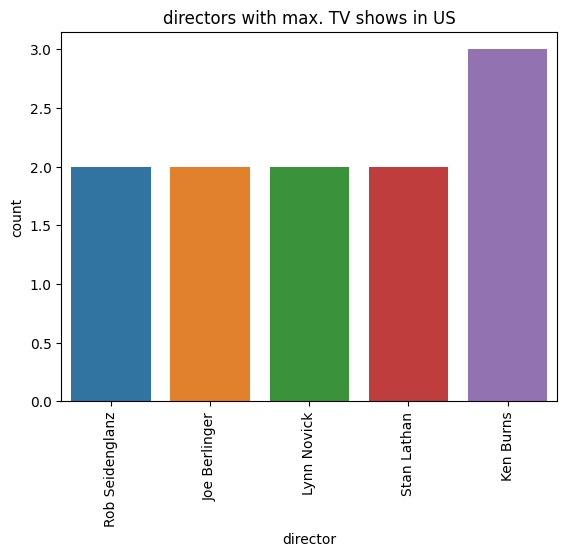

In [ ]:
ustv_data=tvcountry_data[tvcountry_data['country']=='United States'].merge(tvdir_data,on='show_id')                     #popular Tv show directors in US
sns.countplot(data=ustv_data[ustv_data['director'].isin(ustv_data['director'].value_counts().index[:5])],x='director')
plt.xticks(rotation=90)
plt.title('directors with max. TV shows in US')

Observation:


*   **Jay Karas** is one of the most popular directors from US as he have directed 15 movies followed by Marcus Raboy and Jay Chapman.
*   **Ken Burns** is the director who has directed the maximum number of TV shows in US available on Netflix i.e. 3.



**What are the most popular categories/genres in US?**

Text(0.5, 1.0, 'Categories with max number of movies in US')

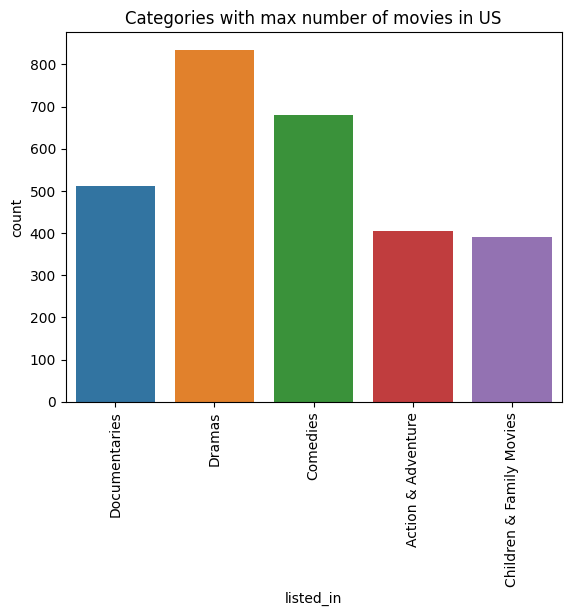

In [ ]:
usm_data=mcountry_data[mcountry_data['country']=='United States'].merge(mlisted_data,on='show_id')                     #popular movie categories in US
sns.countplot(data=usm_data[usm_data['listed_in'].isin(usm_data['listed_in'].value_counts().index[:5])],x='listed_in')
plt.xticks(rotation=90)
plt.title('Categories with max number of movies in US')

Text(0.5, 1.0, 'categories with max number of TV shows in US')

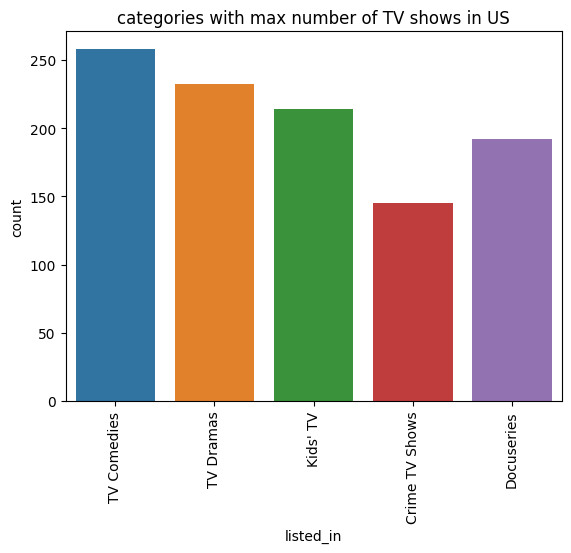

In [ ]:
ustv_data=tvcountry_data[tvcountry_data['country']=='United States'].merge(tvlisted_data,on='show_id')                     #popular movie categories in US
sns.countplot(data=ustv_data[ustv_data['listed_in'].isin(ustv_data['listed_in'].value_counts().index[:5])],x='listed_in')
plt.xticks(rotation=90)
plt.title('categories with max number of TV shows in US')

Observation:


*   **Dramas** is the most popular category for movies from United States followed by Comedies and Documentries.
*   **TV Comedies** is the most popular category for TV Shows from United States available on netflix followed by TV Dramas and Documentries.




**Which Actor/Actress is the most famous/casted among the tv shows and movies produced in United States?**

Text(0.5, 1.0, 'Cast with max number of movies in US')

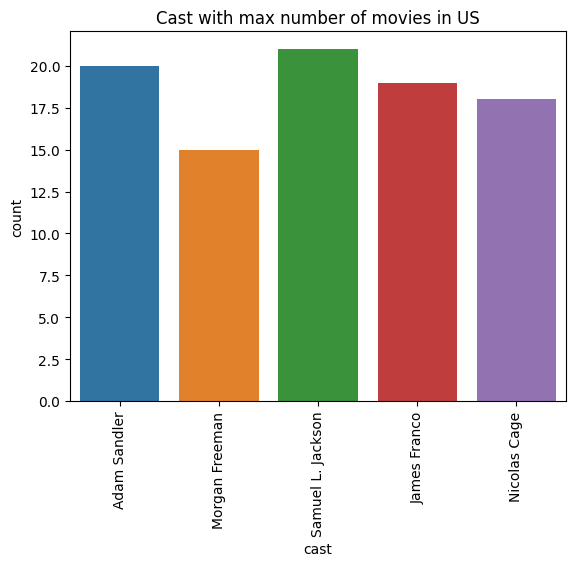

In [ ]:
usm_data=mcountry_data[mcountry_data['country']=='United States'].merge(mcast_data,on='show_id')                     #popular movie casts in US
sns.countplot(data=usm_data[usm_data['cast'].isin(usm_data['cast'].value_counts().index[:5])],x='cast')
plt.xticks(rotation=90)
plt.title('Cast with max number of movies in US')

Text(0.5, 1.0, 'Cast with max number of TV shows in US')

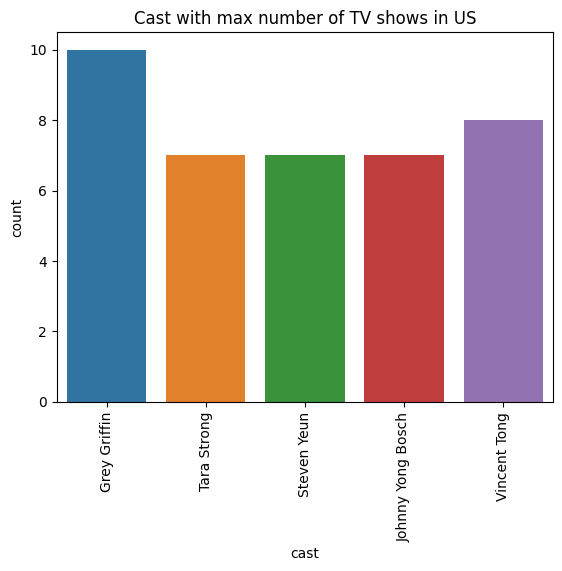

In [ ]:
ustv_data=tvcountry_data[tvcountry_data['country']=='United States'].merge(tvcast_data,on='show_id')                     #popular movie casts in US
sns.countplot(data=ustv_data[ustv_data['cast'].isin(ustv_data['cast'].value_counts().index[:5])],x='cast')
plt.xticks(rotation=90)
plt.title('Cast with max number of TV shows in US')

Observation:


*   **Samuel L. Jackson** is the most popular actor casted in movies produced in United States followed by Adam Sandler and James Franco.
*   **Grey Griffin** is the most popular actor casted in tv shows produced in United States followed by Vincent Tong.



# 4.2 For categorical variable(s): Boxplot

**Movies and tv shows of which year are most popular on Netflix?**

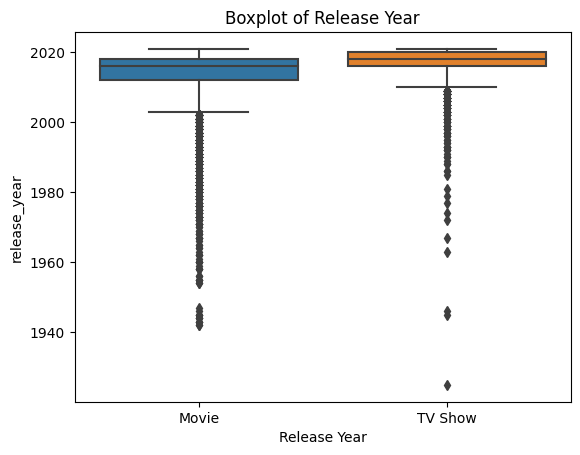

In [ ]:
sns.boxplot(data=data,y='release_year',x='type')               #movies and tv shows vs release_years
plt.title("Boxplot of Release Year")
plt.xlabel("Release Year")
plt.show()

Observation:


*   Maximum movies available on netflix are about from the year 2012-2018
*   Comparatively newer TV shows are available on Netflix as compared to the movies. Maximum tv shows available on netflix are about from the year 2016-2020.

*   There are much fewer outliers in tv shows as compared to movies.




**What is the ideal duration for movies and tv shows on Netflix(duration of majority of content available on Netflix)?**

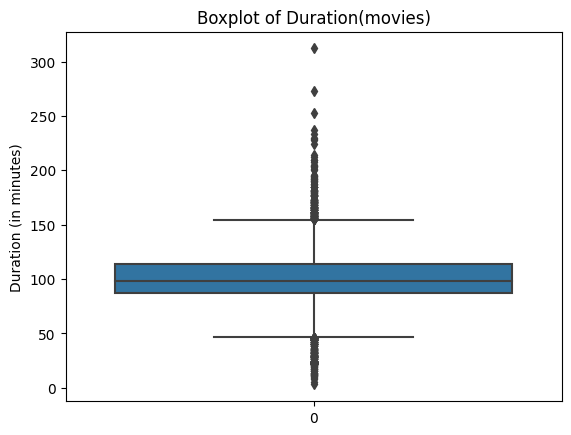

In [ ]:
sns.boxplot(m_data['duration in min'])                #duration of movies
plt.title("Boxplot of Duration(movies)")
plt.ylabel("Duration (in minutes)")
plt.show()

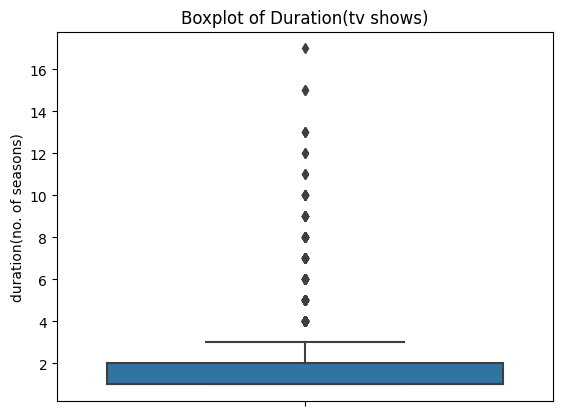

In [ ]:
sns.boxplot(data=tv_data,y='duration(no. of seasons)')              #duration of tv shows
plt.title("Boxplot of Duration(tv shows)")
plt.show()

Observation:


*   Maximum movies available on Netflix are of duration 90-110 minutes, hence we can say that this range will be the preferred duration for the viewers for any movie.
*   Maximum tv shows are of 1-2 seasons only, this implies that these shows are not that much successful as compared to other outliers where shows have 6-17 seasons. The one most popular/successful show available in Netflix have about 17 seasons.



**Since there are only 2 tv shows with seasons more than 14, which implies that these are the 2 most successful tv shows available on Netflix, what are the categories of these tv shows?**

Text(0.5, 1.0, 'Categories of most successful Tv shows')

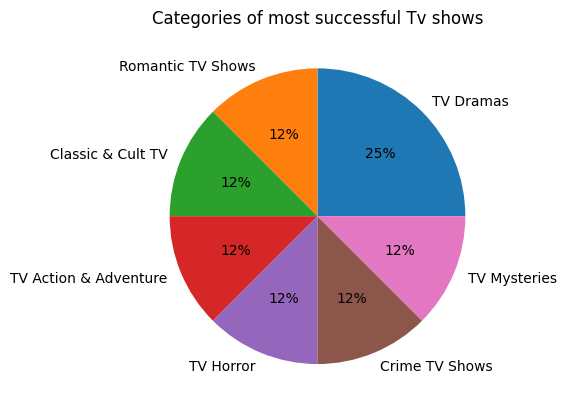

In [ ]:
dummy=tvlisted_data.merge(tv_data, on='show_id')
dummy=dummy[dummy['duration(no. of seasons)']>=15]['listed_in_x'].value_counts()
plt.pie(dummy,labels=dummy.index,autopct='%.0f%%')
plt.title('Categories of most successful Tv shows')

Observation:


*   Both the TV shows are in the category of **TV Dramas**.
*   Apart from this category, other category in which the top 2 successful shows are **TV Mysteries, Crime TV Shows, TV Horror, TV Action & Adventure, Cult & Classic TV and Romantic TV Shows.**



**Among the top 5/most popular directors of movies and tv shows, content of which timeperiod is the most famous for each the directors.**

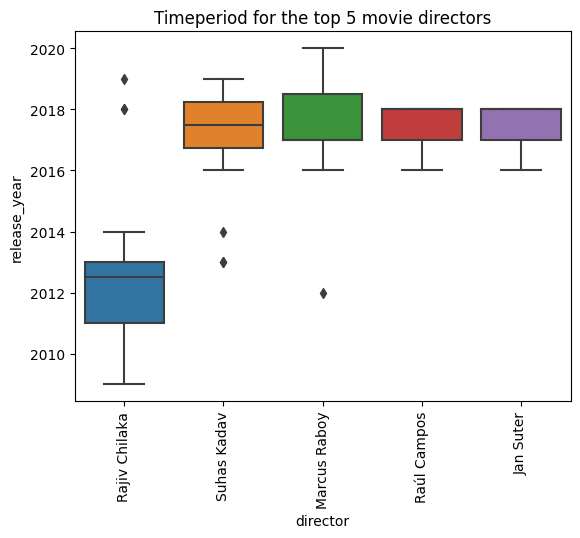

In [ ]:
dir_rel=mdir_data.merge(m_data, on='show_id')                           #top 5 movies directors
dir_rel.drop(columns=['director_y'],inplace=True)
dir_rel.rename(columns={'director_x':'director'},inplace=True)
sns.boxplot(data=dir_rel[dir_rel['director'].isin(dir_rel['director'].value_counts().index[:5])],x='director',y='release_year')
plt.xticks(rotation=90)
plt.title('Timeperiod for the top 5 movie directors')
plt.show()

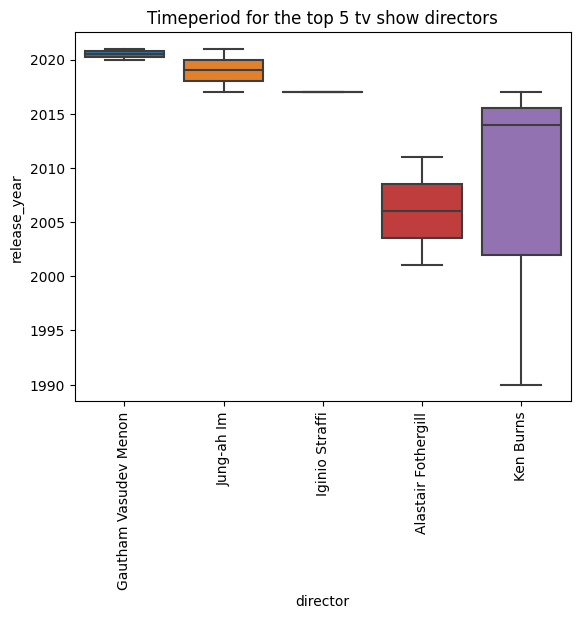

In [ ]:
dir_rel=tvdir_data.merge(tv_data, on='show_id')               #top 5 tv shows directors
dir_rel.drop(columns=['director_y'],inplace=True)
dir_rel.rename(columns={'director_x':'director'},inplace=True)
sns.boxplot(data=dir_rel[dir_rel['director'].isin(dir_rel['director'].value_counts().index[:5])],x='director',y='release_year')
plt.xticks(rotation=90)
plt.title('Timeperiod for the top 5 tv show directors')
plt.show()

Observation:

If we see majority of movies by a director in a particular timeperiod, we can imply that movies by that director and of those years are the most popular once on Netflix.
*   Among the top 5 dirctors of movies available on Netflix, majority of movies by Rajiv Chilaka are from 2011-2013, Suhas Kadav are from 2017-2018, Marcus Raboy also from 2017-2019 and Raul Campos and Jan Sutler from 2017-2018. Movies of these years are mostly appreciated by the viewers.
*   Among the top 5 directors of TV Shows available on Netflix, Gautham Vasudev Menon is the one director whose tv shows are released recently in 2020-21 and have gained a lot of popularity and Jung-ah-lm have majority of tv shows from 2018-20. Alastair Fothergill and Ken Burns are 2 old directors as major chunk of their tv shows available on Netflix range from 2003-2008 and 2002-2015. Iginio Straffi is the only director in the top 5 who has tv show released in oly one year i.e. 2017



# 4.3 For correlation: Heatmaps, Pairplots

**pairplot for movies:**

In [ ]:
m_data['date_added']=m_data['date_added'].dt.year

<ipython-input-75-d79476824297>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data['date_added']=m_data['date_added'].dt.year


In [ ]:
m_data.corr()

<ipython-input-76-f5f7f7478d3e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  m_data.corr()


,date_added,release_year,duration in min
date_added,1.000000,0.039285,0.124398
release_year,0.039285,1.000000,-0.206282
duration in min,0.124398,-0.206282,1.000000


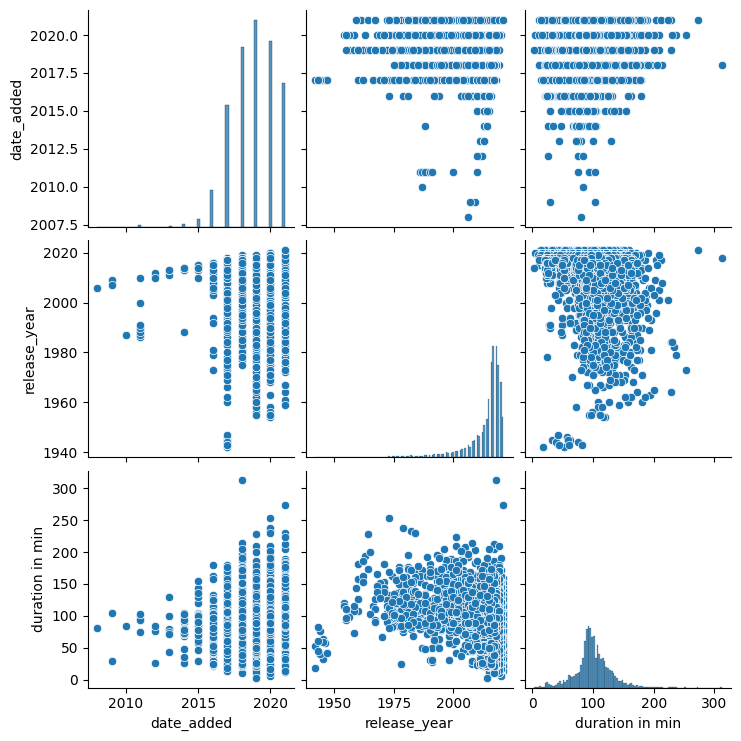

In [ ]:
sns.pairplot(m_data)

Observation:


*   Initially very few movies were added on Netflix, among those maximum were movies from 2000s only. Later on after 2015, along with the new movies, content released in 1970s,80s and 90s also started adding on the platform.
*   date_added and duration has somewhat positive correlation as initially before 2012, maximum movies were added with a maximum duration of about 100 min whereas after that both short and long format movies started adding to the platform equally.


*   release_year and duration has somewhat negative correlation as movies released before 1950s were maximum of 100min duration. However movies released from 1950s-90s majorly had duration 100-200min, whereas movies released after after 2000 were of somewhat equally of long as well as short format. Hence making a negative correlation.





**Pairplot for TV Shows:**

In [ ]:
tv_data['date_added']=tv_data['date_added'].dt.year

<ipython-input-78-c703468e3105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data['date_added']=tv_data['date_added'].dt.year


In [ ]:
tv_data.corr()

<ipython-input-79-bd3e64562100>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tv_data.corr()


,date_added,release_year,duration(no. of seasons)
date_added,1.000000,0.388224,0.042253
release_year,0.388224,1.000000,-0.090194
duration(no. of seasons),0.042253,-0.090194,1.000000


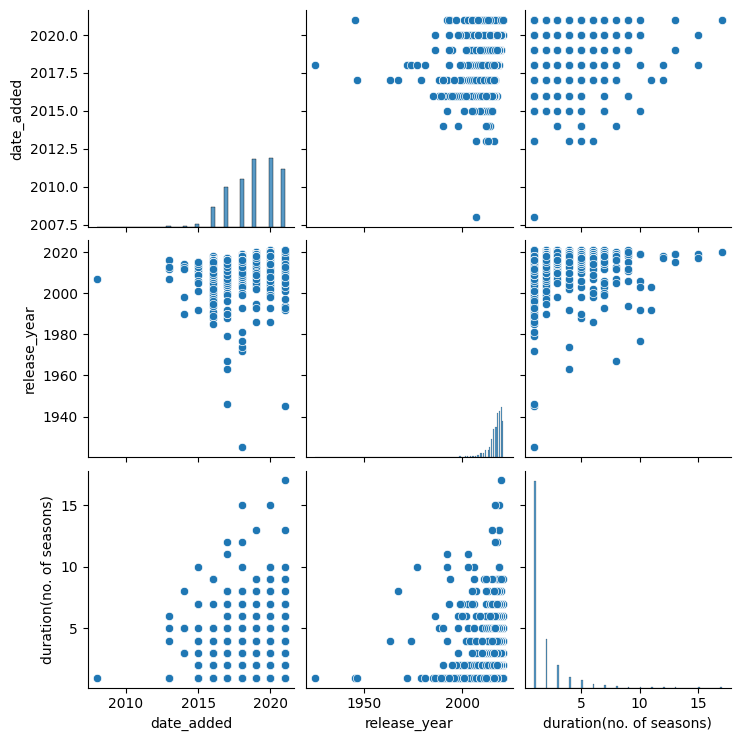

In [ ]:
sns.pairplot(tv_data)

Observation:


*   In the initial years before 2012, very few tv shows were added to the platform and that aslo recently released ones. But after that TV shows became popular among the audience and hence a large quantity of shows are added to the platform that not only included newly produced ones but also included some shows from 1950s, 60s, 70s and so on.
*   Initially only one show was added to the platform and it was not successful as it had only one season. But after 2012, tv shows became popular among the audience and many shows were added after that to the platform including shows which were a huge hit as we can see some shows released in 2018-21 having more than 10 seasons hence making them a hige hit.


*   Netflix contains very few tv shows that were released before 1990s. However, we can see that shows released after 2000s are a big hit as the platform contains a huge chunk of tv shows released after that time period.




**Heatmap for movies:**

<ipython-input-81-2c12b6e33396>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=m_data.corr(),cmap='Blues',annot=True)


<Axes: >

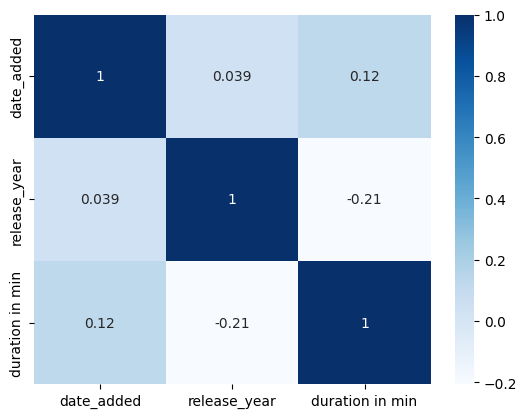

In [ ]:
sns.heatmap(data=m_data.corr(),cmap='Blues',annot=True)

Observation:


*   Release year and duration of movies have a negarive linear relation between them.
*   date_added and duration of movies have a weak positive linear relation between them.
*   release_year and date_added of movies have an extremely weak linear relation between them




**Heatmap for TV Shows:**

<ipython-input-82-390e3ec2f50a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=tv_data.corr(),cmap='Blues',annot=True)


<Axes: >

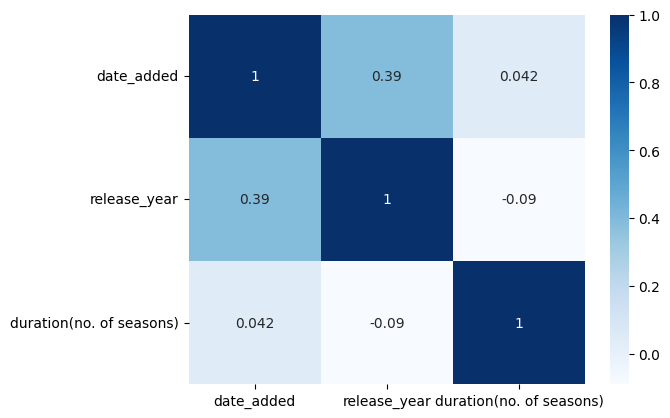

In [ ]:
sns.heatmap(data=tv_data.corr(),cmap='Blues',annot=True)

Observation:


*   Similar to the data for movies, tv shows also have a weak negative liner relationship for release_year and the number of seasons of tv shows.
*   release_year and date_added have a moderate linear relation between them.
*   date_added and the number of seasons for the tv shows have weak posive relation between them.




# 5. Missing Value & Outlier check (Treatment optional)

In [ ]:
m_data.isna().sum()

show_id              0
type                 0
title                0
director           188
cast               475
country            440
date_added           0
release_year         0
rating               2
duration in min      0
listed_in            0
description          0
dtype: int64

In [ ]:
tv_data.isna().sum()

show_id                        0
type                           0
title                          0
director                    2446
cast                         350
country                      391
date_added                    10
release_year                   0
rating                         2
duration(no. of seasons)       0
listed_in                      0
description                    0
dtype: int64



1.   Data for movies and tv shows have some missing values for the director, cast, country,date_added and rating columns.
2.   The data also had some missing values in duration column but we already treated it in the pre-processing of the data.



Drop the missing rows of rating and date_added as there are only 2 and 10 missing values respectively, hence it will not affect our data.

In [ ]:
m_data.dropna(subset=['rating'],inplace=True)

<ipython-input-85-6eafabb48fc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data.dropna(subset=['rating'],inplace=True)


In [ ]:
tv_data.dropna(subset=['rating'],inplace=True)

<ipython-input-86-2fbac5f70ef8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data.dropna(subset=['rating'],inplace=True)


In [ ]:
m_data.dropna(subset=['date_added'],inplace=True)

<ipython-input-87-6fe7ff0568a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data.dropna(subset=['date_added'],inplace=True)


In [ ]:
tv_data.dropna(subset=['date_added'],inplace=True)

<ipython-input-88-37c0660ea561>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data.dropna(subset=['date_added'],inplace=True)


Filling misssing values for m_data and tv_data to unknown:

In [ ]:
m_data.fillna('unknown',inplace=True)

<ipython-input-89-1924385ddc58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data.fillna('unknown',inplace=True)


In [ ]:
tv_data.fillna('unknown',inplace=True)

<ipython-input-90-abe682adf639>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data.fillna('unknown',inplace=True)


In [ ]:
m_data.isnull().any()

show_id            False
type               False
title              False
director           False
cast               False
country            False
date_added         False
release_year       False
rating             False
duration in min    False
listed_in          False
description        False
dtype: bool

In [ ]:
tv_data.isnull().any()

show_id                     False
type                        False
title                       False
director                    False
cast                        False
country                     False
date_added                  False
release_year                False
rating                      False
duration(no. of seasons)    False
listed_in                   False
description                 False
dtype: bool

## 6. Insights based on Non-Graphical and Visual Analysis

**6.1 Comments on the range of attributes**

From all of the above data analysis we can give the following comments on the given data:


*   The given data consists of the information of a total of **8807 contents available on Netflix**.
*   The whole data is divided into 2 types of category: Movies and TV Shows. There are a total of **6131 Movies** and **2676 TV Shows** available in the given dataframe.
*   Given data consist of content added from **2008-01-01 to 2021-09-25**.
*   This data consists of movies that were released from **1942 to 2021** and tv shows that were released from **1925-2021**.
*   The movies data consists of **123 unique countries** that in which the movie was produced in, **20 different categories/genres** and a total of **4777 different directors** that directed these movies.
*   The TV Shows data consists of shows produced in **67 different countries**, **22 categories/genres** and a total of **300 unique directors** who produced these tv shows.
*   Data also consists of cast of the given movie/tv show, rating given to the content by Netflix and the duration which in case of movies range from as small as **3 min to 312 min**, whereas in case of tv shows this duration ranges from **1 season to 17 seasons**.







**6.2 Comments on the distribution of the variables and relationship between them**

For the given data, we can comment the following about the distribution of variable and the relationship between them:

*   There are a total of **6131 movies** and **2627 TV shows** available on Netflix.
*   **Rajiv Chilaka** is the most popular director for movies followed by Jan Sutler, whereas **Alastair Fothergill and Ken Burns** are the 2 most popular TV show directors available on Netflix.
*   There are some movie directors who prefer the same cast/actors for majority of their movies depending on the characters to play. **Rajiv Chilaka is one such director who prefers to cast actors including Rajesh Kava, Julie Tejwani, Jigna Bhardwaj, Rupa Bhimani, Vatsal Dubey, Swapnil and Mousam in his movies**. Apart from him Suhas Kadav, Toshiya Shinohara, S.S. Rajamouli and Yılmaz Erdoğan are also some other directors who prefer to cast some particular acors in their movies repetetively.
*   For TV Shows there are only few directors who prefer to cast the same actors for their shows. **Alastair Fothergill is one director who prefer to work with David Attenborough**. Apart from him few other directors namely Gautham Vasudev Menon, Stan Lathan, Shin Won-ho and Gautham Vasudev Menon are the directors who have casted people more than once for their tv shows.
*   **United States** is the most popular country to produce a movie or a TV show. However, the second most popular country for producing a movieis India whereas for TV show it is United Kingdom.
*   Most popular genre/category for movies is **International Movies** followed by Dramas and Comedies. Similarly for TV shows, the most popular category is **International TV Shows** followed by TV Dramas and TV Comedies.
*   The oldest movie available on Netflix was released in 1942 whereas the newest one was released in 2021. However the first movie which was added to the platform was added on 2008-01-01 and the latest movie was added on 2021-09-25
*   The oldest TV show available on Netflix was released in 1925 whereas the newest one was released in 2021. However the first movie which was added to the platform was added on 2008-02-04 and the latest movie was added on 2021-09-24.
*   Although there are some outliers ranging from 3 min to 300 min, but maximum movies available on the platform have a duration from about **90-100 minutes**. This implies that this is considered to be the **ideal duration range** for a movie on Netflix.
*   Maximum TV shows available on Netflix have **1-2 seasons** except for some outliers where this number jumps to **10, 15 and even 17 seasons**. This implies that there are very few tv shows that are a major hit on Netflix but **by looking at the we can also say that earlier people were not interested in tv shows but not this interest is increasing drastically.**








**6.3 Comments for each univariate and bivariate plot**

Following are the comments from all of the univariate and bivariate graphs above along with their titles:


---



*   **Movies and TV Shows Contribution:** The given data comproses of 70% Movies and the remaining are TV Shows
*   **Most Popular Directors(Movies):** Rajiv Chilaka is the director who has the maximum number of movies on the platform followed by Jan Sutler and Raul Campos.

*   **Most Popular Directors(TV Shows):** Ken Burns and Alastair Fothergill are the two directors who have directed maximum number of TV Shows on Netflix i.e. 3.
*   **Countries with Maximum Movies:** United States is the country where majority of movies available on Netflix were produced followed by India and United Kingdom.

*   **Countries with Maximum TV Shows:** Here also United States is the country where majority of TV shows available on Netflix were produced followed by United Kingdom and Japan.
*   **Number of Movies Added to Netflix by Month:** Dec and Jan are the two most popular months to add new movies on the platform.

*   **Year_diff:**
A majority of content available on netflix was added within 10 years of their release date. hence we can say that new content is much more appreciated by the viewers rather than old one.
*   **Most Popular Movies Categories:** International Movies is the most popular category for movies listed in Netflix followed by Dramas and Comedies.

*   **Most Popular TV Show Category:** Unternational TV Shows is the most popular category for TV Shows available on Netflix followed by TV Dramas and TV Comedies.

*   **Directors with max. movies in US:** Jay Karas is the director who has directed the maximum number of movies in the US followed by Marcus Rabboy.
*   **Directors with max. TV shows in US:** Ken burns is the director who has directed the maximum number of tv shows available on Netflix.

*   **Categories with max number of movies in US:** Maximum movies produced in US are of the category Dramas followed by Comedies and Documentries.

*   **categories with max number of TV shows in US:** Maximum tv shows produced in US are of the category TV Comedies followed by TV Dramas and Kids' TV.

*   **Cast with max number of movies in US:** Samuel L. Jackson is the most popular actor casted in movies produced in United States followed by Adam Sandler and James Franco.
*   **Cast with max number of TV shows in US:** Grey Griffin is the most popular actor casted in tv shows produced in United States followed by Vincent Tong.
*   **Boxplot of Release Year:** Maximum movies available on netflix are from the year 2012-2018, however comparatively newer TV shows are available on Netflix as compared to the movies. Maximum tv shows available on netflix are about from the year 2016-2020.


*   **Boxplot of Duration(movies):** Maximum movies available on Netflix are of a duration range of about 90-110 min so we can say that this range is the ideal one for movies according to the viewers.

*   **Boxplot of Duration(tv shows):** Maximum tv shows are of 1-2 seasons only, this implies that these shoes are not that much successful as compared to other outliers where shows have 6-17 seasons. The one most popular/successful shoe available in Netflix have about 17 seasons.
*   **Categories of most successful Tv shows:** Both the TV shows are in the category of TV Dramas. Apart from this category, other category in which the top 2 successful shows are TV Mysteries, Crime TV Shows, TV Horror, TV Action & Adventure, Cult & Classic TV and Romantic TV Shows.


*   **Timeperiod for the top 5 movie directors:** Among the top 5 dirctors of movies available on Netflix, majority of movies by Rajiv Chilaka are from 2011-2013, Suhas Kadav are from 2017-2018, Marcus Raboy also from 2017-2019 and Raul Campos and Jan Sutler from 2017-2018. Movies of these years are mostly appreciated by the viewers.

*   **Timeperiod for the top 5 tv show directors:** Among the top 5 directors of TV Shows available on Netflix, Gautham Vasudev Menon is the one director whose tv shows are released recently in 2020-21 and have gained a lot of popularity and Jung-ah-lm have majority of tv shows from 2018-20. Alastair Fothergill and Ken Burns are 2 old directors as major chunk of their tv shows available on Netflix range from 2003-2008 and 2002-2015. Iginio Straffi is the only director in the top 5 who has tv show released in oly one year i.e. 2017
















# 7. Business Insights - Should include patterns observed in the data along with what you can infer from it

The following business insight can be inferred from the given data:

---



*   There are a total of 6131 movies and 2676 tv shows available in the given Netflix data. In the initial years, tv shows were not successful but after 2012 viewers started taking ibterest in TV shows also, hence makung sone tv shows so much succesful that they have 14,15 and even 17 seasons.

*   December and January are the month in which maximum new content is added to the platform. This might be because of Christmas and New Year these two months as during holidays people love to watch movies and shows with their family and friends.
*   Maximum movies were added to Netflix within 10 years of their release date. So we can say that this timeperiod is the ideal duration to add any content on Netflix.
*   Maximum movies available on Netflix are from 2012-2018 whereas maximum number of tv shows available are from 2016-2020. This implies and there are much fewer outliers in tv shows as compared to movies. This implies that movies and tv shows of this timeperiod are much more preferred by the viewers.
*   A majority of movies available on Netflix are released after 1960 whereas TV shows after 2000. Hence we can infer that people tend to like old as well as movies released after 1960s whereas for tv shows people prefer slightly newer ones that is after the year 2000.

*   Rajiv Chilaka is the movie director who have the maximum number of movies available on netflix directed by him followed by Jan Sutler and Raul Campos whereas Ken Burns and Alastair Fothergill are the two directors who have directed maximum number of TV Shows on Netflix i.e. 3.

*   Netflix contains maximum movies and tv shows which were produced in the United States. India was the country where second highest number of movies were produced dollowed by United Kingdome whereas for tv shows United Kingdom was the country that produced the second highest number of tv shows followed by Japan.

*   Highest number of movies were listed in Intenational Movies category followed by Comedies and Dramas, similarly highest number of tv shows were listed in International TV shows followed by TV Dramas and Tv Comedies. This shows us that these categories are the most successful on the platform.
*   Since the United States is the country from where maximum content is added to the platform, so some more digging is necessary. After analysis we found out that:
  * Jay Karas is one of the most popular directors from US as he have directed 15 movies followed by Marcus Raboy and Jay Chapman whereas Ken Burns is the US director who has directed the maximum number of TV shows in US available on Netflix i.e. 3.
  * Dramas is the most popular category for movies produced in US followed by Comedies and Documentries whereas for tv shows TV Comedies is the most popular followed by TV Dramas and Documentries.
  * Samuel L. Jackson is the actor who has been casted in movies produced in United States the maximum number of times followed by Adam Sandler and James Franco whereas Grey Griffin is the actor who has been casted in tv shows produced in United States the maximum number of times followed by Vincent Tong.

*  Maximum movies available on Netflix are of duration 90-110 minutes, hence we can say that this range will be the preferred duration for the viewers for any movie.
* Maximum tv shows are of 1-2 seasons only, this implies that these shows are not that much successful as compared to other outliers where shows have 6-17 seasons. However we can see that slowly people are starting enjoying tv shows also as the number of shows with duration more tha 5-6 seasons is increasing in the recent years. The one most popular/successful show available in Netflix have about 17 seasons.



## 8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

After the Analysis, following are the recommendation I would like to give Netflix in order to increase their business:



*   Nowadays, viewers are developing interest in tv shows as well, hence along with movies, much more quality tv shows must be added to the platform.
*   In the recent years many movies with duration above 250min are also added to the plarform, this duration should be kept between 90-120 as accoring to our analysis this is the ideal duration for a movie.
*   Majority of movies and tv shows available on Netflix are produced in the United States only and the difference between the country with highest number of content and second highest is very large so it is adviced that content from other countries like India, Japan, United Kingdom etc must also be added to the platform.
*   Since veiwers are starting to enjoy the tv shows as well, therefore successful tv show directors like Ken Burns, Stan Lethan, Lynn Novick, etc must be encouraged.
*   Comedies and Dramas are the genres which have the maximum number of tv shows and movies, hence other movies in the genre of Action & Adventure and Documentries and tv shows in the genres Crime TV Shows and Kids' TV must also be added.
*   The 2 most successful tv shows are in the categories TV Dramas, TV Mysteries, Crime TV Shows, TV Horror, TV Action & Adventure, Cult & Classic TV and Romantic TV Shows, hence more focus be given on these tv show genres.
*   There are some popular directors who tend to prefer the same cast like Rajiv Chilaka. If the director and cast duo is resulting a maximum number of successful movies and tv shows the these must be preferred.
*   Quality Movies and TV Shows must be added to the platform as soon as possible which will result in more and more subscriptions.